## Reaching Task: Exercise 1
Submitted by **Mohammed Abbas Ansari, Kai Rothe**

### Task 1: Relevant Section of Code

#### Implementation of Perturbation:
```python
if perturbation_mode:
    if perturbation_type == 'sudden':
        #sudden clockwise perturbation of perturbation_angle
        perturbed_mouse_angle = mouse_angle + perturbation_angle

    elif perturbation_type == 'gradual':   
        #gradual counterclockwise perturbation of perturbation_angle in 10 steps, with perturbation_angle/10, each step lasts 3 attempts
        gradual_step = (gradual_attempts // 3) % 10
        perturbed_mouse_angle = mouse_angle - (gradual_step + 1) * perturbation_angle / 10

    perturbed_mouse_pos = (START_POSITION[0] + distance * math.cos(perturbed_mouse_angle), 
                            START_POSITION[1] + distance * math.sin(perturbed_mouse_angle))
    
    circle_pos = perturbed_mouse_pos
```

#### Error Angle Computation:
```python
error_angle = math.atan2(circle_pos[1] - START_POSITION[1], circle_pos[0] - START_POSITION[0]) - math.atan2(new_target[1] - START_POSITION[1], new_target[0] - START_POSITION[0])
```

#### Motor Variability Computation and Plotting:
```python
error_angles = np.degrees(np.array(error_angles))
move_faster_events = np.array(move_faster_events)
attempts = np.arange(1, len(error_angles) + 1)

motor_variabilities = []
for i in [0, 40, 80, 120]:
    motor_variabilities.append(np.var(error_angles[i:i+40]))
motor_variabilities = np.array(motor_variabilities)

fig = plt.figure()
plt.plot(attempts[~move_faster_events], error_angles[~move_faster_events], 'o', linestyle="--", color = "blue", label = "Fast Enough")
plt.plot(attempts[move_faster_events], error_angles[move_faster_events], 'x', linestyle="", color = "red", label = "Too Slow")

plt.axvline(x=40, color='black', linestyle='-')
plt.text(41, plt.ylim()[1] + 1, 'gradual\npertubation', color='black', verticalalignment='top', horizontalalignment='left', weight='bold')
plt.axvline(x=80, color='black', linestyle='-')
plt.text(81, plt.ylim()[1] + 1, 'no\npertubation', color='black', verticalalignment='top', horizontalalignment='left', weight='bold')
plt.axvline(x=120, color='black', linestyle='-')
plt.text(121, plt.ylim()[1] + 1, 'sudden\npertubation', color='black', verticalalignment='top', horizontalalignment='left', weight='bold')
plt.axvline(x=160, color='black', linestyle='-')
plt.text(161, plt.ylim()[1] + 1, 'no\npertubation', color='black', verticalalignment='top', horizontalalignment='left', weight='bold')

plt.ylim(plt.ylim()[0], plt.ylim()[1] + 1.5)
plt.xlim(0, ATTEMPTS_LIMIT)
plt.grid()
plt.xlabel('Attempt')
plt.ylabel('Error Angle [°]')
plt.legend(title='Movement Speed', loc = "lower right")
plt.tight_layout()
```

### Task 2: Analysis of experiment on unbiased subjects

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Error Angles Plot Over Attempts

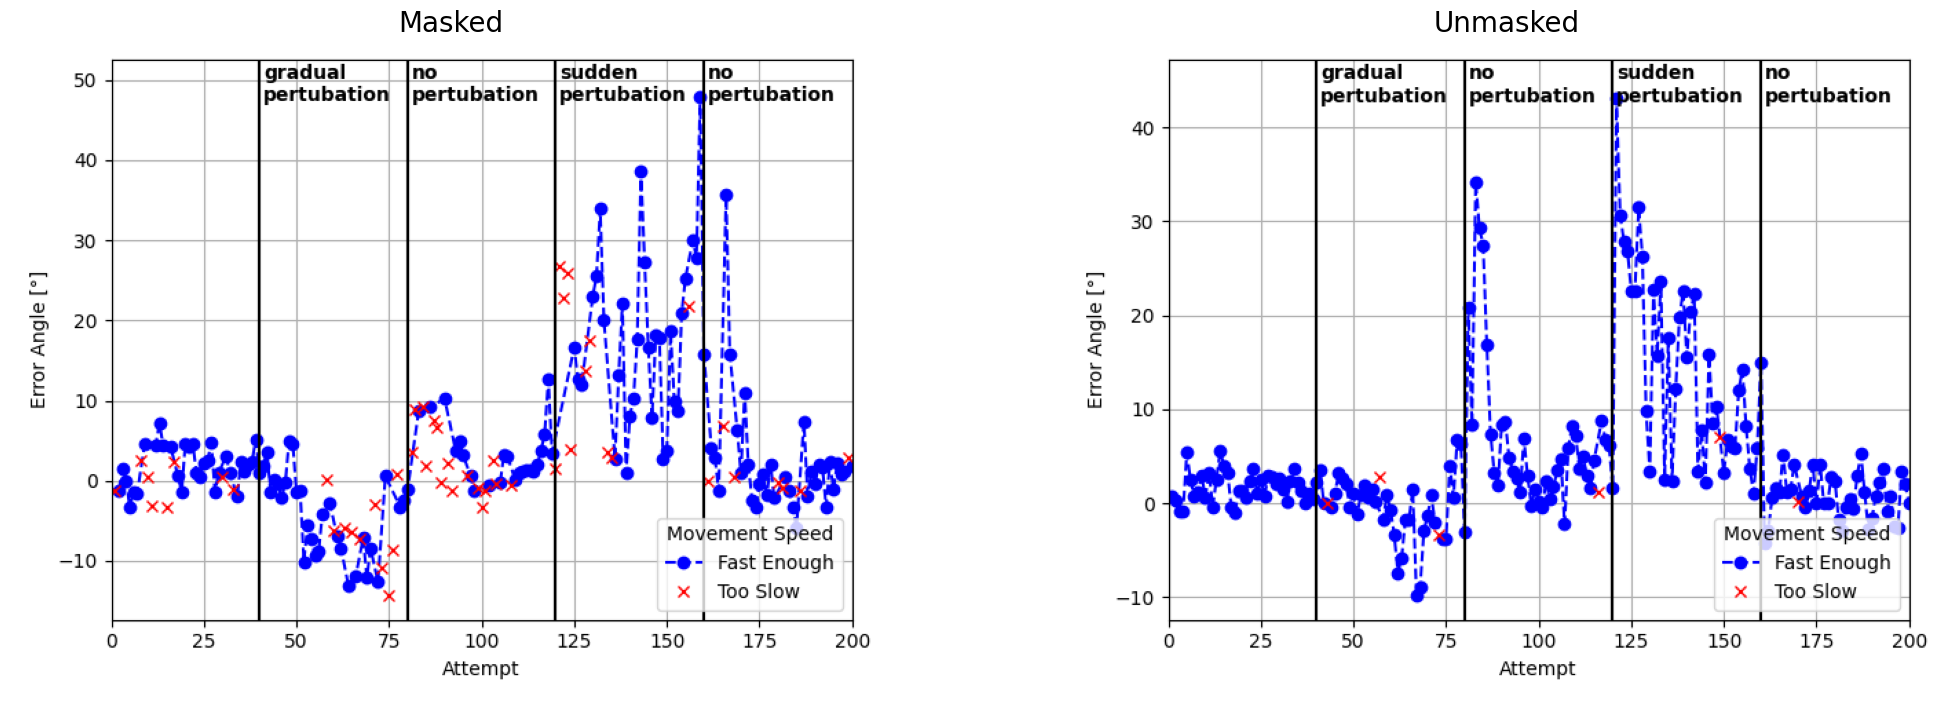

In [7]:
masked_result = plt.imread("errorsexp0.png")
unmasked_result = plt.imread("errorsexp1.png")

plt.figure(figsize=(25, 10))
plt.subplot(1, 2, 1)
plt.imshow(masked_result)
plt.title("Masked", fontsize=20)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(unmasked_result)
plt.title("Unmasked", fontsize=20)
plt.axis("off")

plt.show()

**Observation of subject's movement in unmasked experiment:** 

With unmasking, the subject is able to visually see the cursor reach the target. This lead to lesser "too slow" movements and adaptation is possible in this case when compared to masked experiement where the subject was not able to adapt appropriately during sudden perturbation. We also see observer stronger after effects when perturbations are removed when compared to masked case.

#### Motor Variability

We compute motor variability in the unperturbed segments as the variance of the error angle in all valid attempts (fast enough) made during unperturbed trials.


$$ MV = \text{Var}(\theta_{\text{error}}) $$

where $\theta_{\text{error}}$ represents the error angles during unperturbed trials.

In [24]:
move_faster_masked = pd.read_csv("move_faster_exp0.csv").to_numpy(dtype="bool").flatten()
error_angles_masked = pd.read_csv("error_angles_exp0.csv").to_numpy(dtype="float").flatten()
move_faster_unmasked = pd.read_csv("move_faster_exp1.csv").to_numpy(dtype="bool").flatten()
error_angles_unmasked = pd.read_csv("error_angles_exp1.csv").to_numpy(dtype="float").flatten()

unperturbed_segments_idx = [(0, 39), (80, 119), (160, 198)]
valid_unperturbed_error_angles_masked = []
for start, end in unperturbed_segments_idx:
    valid_unperturbed_error_angles_masked.extend(error_angles_masked[start:end][~move_faster_masked[start:end]])

valid_unperturbed_error_angles_unmasked = []
for start, end in unperturbed_segments_idx:
    valid_unperturbed_error_angles_unmasked.extend(error_angles_unmasked[start:end][~move_faster_unmasked[start:end]])
    
motor_variability_masked = np.var(valid_unperturbed_error_angles_masked)
motor_variability_unmasked = np.var(valid_unperturbed_error_angles_unmasked)

print(f"Motor Variability during unperturbed segments in Masked Experiment: {motor_variability_masked}")
print(f"Motor Variability during unperturbed segments in Unmasked Experiment: {motor_variability_unmasked}")

Motor Variability during unperturbed segments in Masked Experiment: 25.870402106934243
Motor Variability during unperturbed segments in Unmasked Experiment: 28.84525840146628


### Task 3:

### Task 4: